# Setup
To use ATOCA (Algorithm to Treat Order ContAmination), the jwst dms needs to be properly installed.
Also, the simulated data set needs to be downloaded. This notebook assumes that every reduction steps required before the 1d extraction have been perform.

# Imports

In [1]:
# Import os to make the output directory
import os
import numpy as np

from jwst import datamodels
# Only import the extraction step
from jwst.extract_1d import Extract1dStep

# Import utilities to analyse the outputs
# from analysis_tools import 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm #for better display of FITS images

In [2]:
%matplotlib notebook

# Run extraction with defaults
Note: This step can be relatively long, few minutes, especially when testing for different factors

In [3]:
# Path and name to the data
filename = '/home/adb/dms-integration/simulations/loic_tests/substrip256_clear_noisy_rateints.fits'

# Create output directory
output_dir = 'atoca_results'
try:
    os.mkdir(output_dir)
except FileExistsError:
    pass

# Set parameters given to the step.
parameters = dict()
parameters['soss_atoca'] = True  # For now, atoca is turned off by default. Needs to be set to True
parameters['output_dir'] = output_dir  # Where to save the outputs
parameters['output_file'] = 'substrip256_extract1d.fits'  # Name of output file

# To check that the decontamination went well,
# it is better to save the model used for decontamination.
# It won't be saved by default. 
parameters['soss_modelname'] = 'substrip256_tracemodels'

parameters['soss_transform'] = [0,0,0]
parameters['subtract_background'] = False

# Run extraction
result = Extract1dStep().call(filename, **parameters)

2022-01-14 10:09:50,336 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.
2022-01-14 10:09:52,118 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.
2022-01-14 10:09:52,252 - stpipe.Extract1dStep - INFO - Step Extract1dStep running with args ('/home/adb/dms-integration/simulations/loic_tests/substrip256_clear_noisy_rateints.fits',).
2022-01-14 10:09:52,255 - stpipe.Extract1dStep - INFO - Step Extract1dStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/home/adb/Presentation_NEAT/substrip256_extract1d.fits', 'output_dir': 'atoca_results', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'smoothing_length': None, 'bkg_fit': 'poly', 'bkg_order': None, 'bkg_sigma_clip': 3.0, 'log_increment': 50, 'subtract_background': False, 'use_source_posn': None, 'center_xy': None, 'apply_apcorr': True, 'soss_atoca': True, 'soss_th

2022-01-14 10:16:04,125 - stpipe.Extract1dStep - INFO - 0/20
2022-01-14 10:16:04,141 - stpipe.Extract1dStep - INFO - 1/20
2022-01-14 10:16:04,157 - stpipe.Extract1dStep - INFO - 2/20
2022-01-14 10:16:04,172 - stpipe.Extract1dStep - INFO - 3/20
2022-01-14 10:16:04,188 - stpipe.Extract1dStep - INFO - 4/20
2022-01-14 10:16:04,203 - stpipe.Extract1dStep - INFO - 5/20
2022-01-14 10:16:04,217 - stpipe.Extract1dStep - INFO - 6/20
2022-01-14 10:16:04,231 - stpipe.Extract1dStep - INFO - 7/20
2022-01-14 10:16:04,245 - stpipe.Extract1dStep - INFO - 8/20
2022-01-14 10:16:04,259 - stpipe.Extract1dStep - INFO - 9/20
2022-01-14 10:16:04,274 - stpipe.Extract1dStep - INFO - 10/20
2022-01-14 10:16:04,288 - stpipe.Extract1dStep - INFO - 11/20
2022-01-14 10:16:04,302 - stpipe.Extract1dStep - INFO - 12/20
2022-01-14 10:16:04,315 - stpipe.Extract1dStep - INFO - 13/20
2022-01-14 10:16:04,329 - stpipe.Extract1dStep - INFO - 14/20
2022-01-14 10:16:04,343 - stpipe.Extract1dStep - INFO - 15/20
2022-01-14 10:16:0

Note: We can see here that it is relatively long to converge to a good value of the tikhonov factor. However, this step is done only once for the first integration. The same factor is kept for the next integrations.

## Looking at the outputs
The extract1d step returns only the extracted 1d spectra as a MultiSpecModel

In [4]:
# Show some of the MultiSpecModel attributes
result.info(max_rows=50)

root (AsdfObject)
├─meta (dict)
│ ├─model_type (str): MultiSpecModel
│ ├─date (str): 2022-01-14T15:09:52.548
│ ├─filename (str): substrip256_extract1d_extract1dstep.fits
│ ├─calibration_software_version (str): 1.3.4.dev96+g6882bd0d.d20220111
│ ├─calibration_software_revision (str): 6882bd0d
│ ├─telescope (str): JWST
│ ├─observation (dict)
│ │ ├─date (str): 2020-02-05
│ │ └─time (str): 11:08:45.000
│ ├─visit (dict)
│ ├─target (dict)
│ │ ├─ra (float): 188.38685
│ │ ├─dec (float): -10.14617305555556
│ │ └─source_type (NoneType): None
│ ├─instrument (dict)
│ │ ├─name (str): NIRISS
│ │ ├─detector (str): NIS
│ │ ├─filter (str): CLEAR
│ │ └─pupil (str): GR700XD
│ ├─exposure (dict)
│ │ ├─type (str): NIS_SOSS
│ │ ├─readpatt (str): NISRAPID
│ │ ├─nints (int): 2
│ │ ├─ngroups (int): 5
│ │ ├─nframes (int): 1
│ │ ├─groupgap (int): 0
│ │ ├─frame_time (float): 5.494
│ │ ├─group_time (float): 5.494
│ │ ├─duration (float): 1.0
│ │ ├─nresets_at_start (int): 1
│ │ └─nresets_between_ints (int): 1
│ ├─suba

In [5]:
# Each spectrum has a tag to indicate the integration number and the extracted order
for spec in result.spec:
    print('Integration', spec.int_num, 'Order', spec.spectral_order)

Integration 1 Order 1
Integration 1 Order 2
Integration 1 Order 3
Integration 2 Order 1
Integration 2 Order 2
Integration 2 Order 3


In [90]:
result.spec[0].spec_table.columns

ColDefs(
    name = 'WAVELENGTH'; format = 'D'
    name = 'FLUX'; format = 'D'
    name = 'FLUX_ERROR'; format = 'D'
    name = 'FLUX_VAR_POISSON'; format = 'D'
    name = 'FLUX_VAR_RNOISE'; format = 'D'
    name = 'FLUX_VAR_FLAT'; format = 'D'
    name = 'SURF_BRIGHT'; format = 'D'
    name = 'SB_ERROR'; format = 'D'
    name = 'SB_VAR_POISSON'; format = 'D'
    name = 'SB_VAR_RNOISE'; format = 'D'
    name = 'SB_VAR_FLAT'; format = 'D'
    name = 'DQ'; format = 'J'; bzero = 2147483648
    name = 'BACKGROUND'; format = 'D'
    name = 'BKGD_ERROR'; format = 'D'
    name = 'BKGD_VAR_POISSON'; format = 'D'
    name = 'BKGD_VAR_RNOISE'; format = 'D'
    name = 'BKGD_VAR_FLAT'; format = 'D'
    name = 'NPIXELS'; format = 'D'
)

<IPython.core.display.Javascript object>


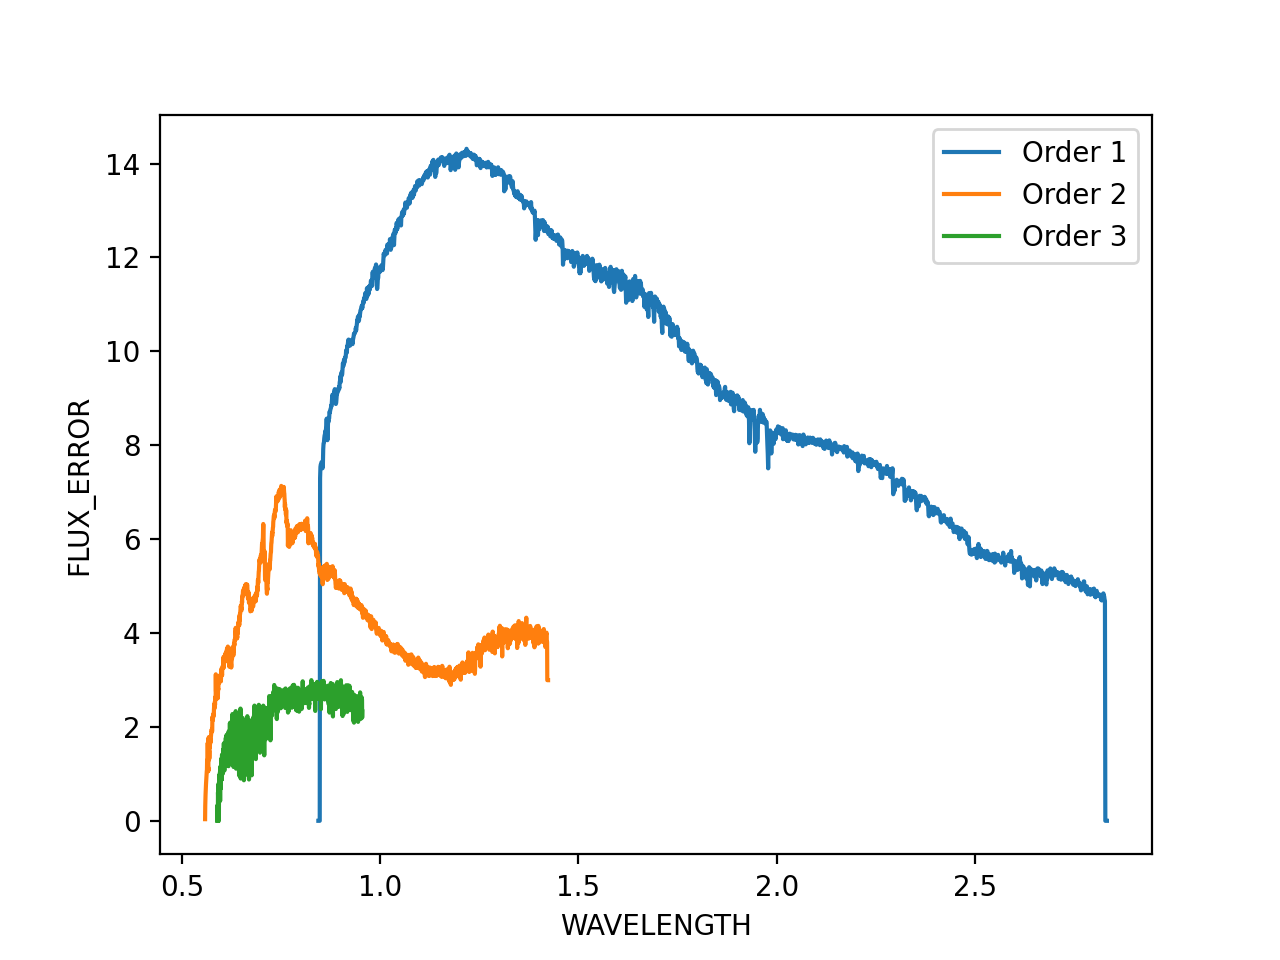

Text(0, 0.5, 'FLUX_ERROR')

In [110]:
x_key, y_key = 'WAVELENGTH', 'FLUX_ERROR'
plt.figure()
for spec in result.spec[:3]:
    sp_ord = spec.spectral_order
    plt.plot(spec.spec_table[x_key], spec.spec_table[y_key], label=f'Order {sp_ord}')
plt.legend()
plt.xlabel(x_key)
plt.ylabel(y_key)


### Detector model

In [7]:
model_file = os.path.join(parameters['output_dir'], 'substrip256_tracemodels_SossExtractModel.fits')

In [8]:
soss_model = datamodels.open(model_file)
data = datamodels.open(filename)

In [114]:
soss_model.info(max_rows=50)

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.8.3
├─history (dict)
│ └─extensions (list)
│   └─[0] (ExtensionMetadata) ...
├─_fits_hash (str): be752464938449f595f7815e8c3fadc498b4e533f0ef473705d217426d85f347
├─aperture1 (NDArrayType): shape=(2, 256, 2048), dtype=float32
├─aperture2 (NDArrayType): shape=(2, 256, 2048), dtype=float32
├─aperture3 (NDArrayType): shape=(2, 256, 2048), dtype=float32
├─meta (dict)
│ ├─bunit_data (str): DN/s
│ ├─cal_step (dict)
│ │ ├─dark_sub (str): COMPLETE
│ │ ├─dq_init (str): COMPLETE
│ │ ├─gain_scale (str): SKIPPED
│ │ ├─linearity (str): COMPLETE
│ │ ├─ramp_fit (str): COMPLETE
│ │ ├─refpix (str): COMPLETE
│ │ ├─saturation (str): COMPLETE
│ │ └─superbias (str): COMPLETE
│ ├─calibration_software_revision (str): RELEASE
│ ├─calibration_software_version (str): 1.3.3
│ ├─date (str): 2022-01-14T15:16:57.912
│ ├─exposure (dict)
│ │ 

<IPython.core.display.Javascript object>


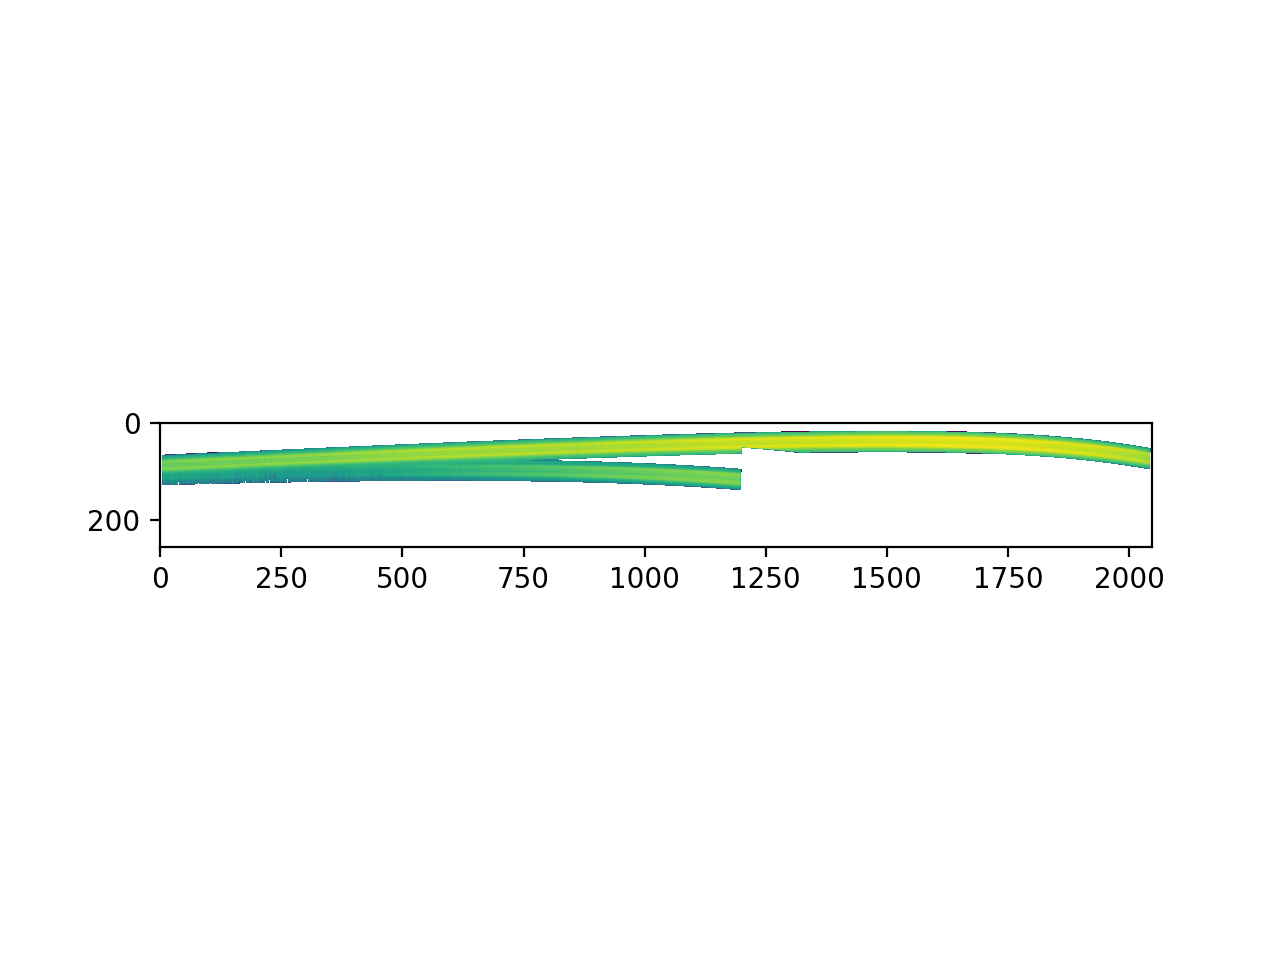

In [115]:
detector_model = soss_model.order1 + soss_model.order2
plt.imshow(detector_model[0], norm=LogNorm())

# The End